# 1. Classification and Regression Trees
## Decision tree for classification


**Classification-tree**

Sequence of if-else questions about individual features.

* Objective: infer class labels.

* Able to capture non-linear relationships between features and labels.

* Don't require feature scaling (ex:Standardization,..)


In [1]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score
# Split the dataset into 80% train, 20% test
# X_train, X_test, y_train, y_test= train_test_split(X, y,
#                                                    test_size=0.2,
#                                                    stratify=y,
#                                                    random_state=1)
# # Instantiate dt

# dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# # Fit dt to the training set
# dt.fit(X_train,y_train) 
# # Predict the test set labels
# y_pred = dt.predict(X_test)
# # Evaluate the test-set accuracy
# accuracy_score(y_test, y_pred)

**Decision Regions**
> `Decision region`: region in the feature space where all instances areas signed to one class label.

> `Decision Boundary`: surface separating different decision regions.


### Train your first classification tree
We'll work with the Wisconsin Breast Cancer Dataset from the UCI machine learning repository. We'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (`radius_mean`) and its mean number of concave points (`concave points_mean`).
<a href="https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data">DATASET</a>

In [12]:
import pandas as pd
wbc = pd.read_csv('wbc.csv')
wbc['Diagnosis_num'] = wbc['diagnosis'].map({'B':0, 'M':1})
X = wbc[['radius_mean', 'concave points_mean']].values
y = wbc['Diagnosis_num'].values

In [25]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   test_size=0.2,
                                                   stratify=y,
                                                   random_state=1)


In [26]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


> You can see the first five predictions made by the fitted tree on the test set in the console. 

### Evaluate the classification tree


In [27]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.91


> Using only two features, your tree was able to achieve an accuracy of 89%!

### Logistic regression vs classification tree


In [46]:
import matplotlib.pyplot as plt
import numpy as np
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]
clfs


[LogisticRegression(random_state=1),
 DecisionTreeClassifier(max_depth=6, random_state=1)]

## Classification tree Learning


**Building Blocks of a Decision-Tree**

* Decision-Tree: data structure consisting of a hierarchy of nodes.

* Node: question or prediction.

**Building Blocks of a Decision-Tree**

Three kinds of nodes:

* Root: no parent node, question giving rise to two children nodes.
* Internalnode: one parent node, question giving rise to two children nodes.
* Leaf:one parent node, no children nodes --> prediction.

**Information Gain(IG)**

Criteria to measure the impurity of a node $I(node)$:
* gini index
* entropy

**Classification-Tree Learning**
* Nodes are grown recursively.
* At each node, split the data based on:
    * feature $f$ and split-point $sp$ to maximize $IG(node)$.
* If $IG(node)=0$, declare the node a leaf.

In [47]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Split dataset into 80% train, 20% test

X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   test_size=0.2,
                                                   stratify=y,
                                                   random_state=1)

# Instantiate dt, set 'criterion' to 'gini'

dt = DecisionTreeClassifier(criterion='gini', random_state=1)

# Fit dt to the training set

dt.fit(X_train,y_train)

# Predict test-set labels

y_pred= dt.predict(X_test)

# Evaluate test-set accuracy
accuracy_score(y_test, y_pred)

0.8245614035087719

### Using entropy as a criterion


In [48]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [50]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [51]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

y_pred = dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}')


Accuracy achieved by using entropy: 0.886
Accuracy achieved by using the gini index: 0.833


> Notice how the two models achieve almost the same accuracy. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.

## Decision tree for regression


In [75]:
auto = pd.read_csv('auto.csv')
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


<AxesSubplot:xlabel='displ', ylabel='mpg'>

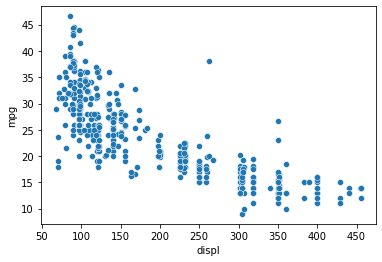

In [55]:
import seaborn as sns
sns.scatterplot(x='displ', y='mpg', data=auto)

> Mpg consumption increases non-linearly with displacement.

In [68]:
X = auto['displ'].values
y = auto['mpg'].values
### Important reshape
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [69]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Import train_test_split 
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                       test_size=0.2,
                                                       random_state=3)

# Instantiate a DecisionTreeRegressor 'dt'

dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf=0.1,
                           random_state=3)

In [70]:
# Fit 'dt' to the training-set
dt.fit(X_train, y_train)
# Predict test-set labels
y_pred = dt.predict(X_test)
# Compute test-set MSE
mse_dt =  MSE(y_test, y_pred)
# Compute test-set RMSE
rmse_dt = mse_dt**(1/2)
# Print rmse_dt
print(rmse_dt)

5.102306888903137


### Train your first regression tree


In [79]:
auto = pd.read_csv('auto.csv')
auto.shape

(392, 7)

In [80]:
origin = pd.get_dummies(auto['origin'])
origin.shape

(392, 3)

In [83]:
cleaned_auto = auto.merge(origin, left_index=True, right_index=True)
cleaned_auto.shape

(392, 10)

In [97]:
cleaned_auto = cleaned_auto.drop('origin', axis=1)

In [98]:
y = auto['displ'].values
y = y.reshape(-1,1)
print(X.shape)
X = cleaned_auto.drop('displ', axis=1)
print(y.shape)

(392, 9)
(392, 1)


In [102]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

### Evaluate the regression tree


In [103]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt =  MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 5.04


# 2. The Bias-Variance Tradeoff

## Generalization Error


**Goals of Supervised Learning** 
1. Find a model $\hat{f}$ that best approximates $f$
2. $\hat{f}$ can be Logistic Regression, Decision Tree, Neural Network
3. Discard noise as much as possible.
4. Endgoal: $\hat{f}$ should achieve a low predictive error on unseen datasets.

**Difficulties in Approximating $f$** 

* **Overfitting:** $\hat{f}(x)$ fits the training set noise.

* **Undering:** $\hat{f}$ is not flexible enough to approximate $f$.


### Generalization Error

* **Generalization Error of $\hat{f}$:** Does $\hat{f}$ generalize well on unseen data?
* It can be decomposed as follows: Generalization Error of

$\hat{f} = bias^2 + variance + irreducible error$

##### Bias

**Bias:** error term that tells you, on average, how much $\hat{f} ≠ f$

##### Variance
**Variance:** tells you how much $\hat{f}$ is inconsistent over different training sets.


> **As the complexity of $\hat{f}$ increases, the bias term decreases while the variance term increases.**

### Diagnose bias and variance problems

##### Estimating the Generalization Error

* How do we estimate the generalization error of a model?
* Cannot be done directly because:

    * $f$ is unknown, usually you only have one dataset, noise is unpredictable.

**Solution:**

* split the data to training and test sets

* fit $\hat{f}$ to the training set
* evaluate the error of $\hat{f}$ on the unseen test set
* generalization error of $\hat{f}≈$ test set error of $\hat{f}$.


##### Better Model Evaluation with Cross-Validation 

* Test set should not be touched until we are confident about $\hat{f}$'s performance.
* Evaluating $\hat{f}$ on training set: biased estimate, $\hat{f}$ has already seen all training points.
* **Solution** → Cross-Validation(CV):
    * K-FoldCV
    * Hold-OutCV
    
###### Diagnose Variance Problems 
* If $\hat{f}$ suffers from high variance: CV error of  > training set error of.

* $\hat{f}$ is said to overfit the training set. To remedy overfitting:

    * decrease model complexity
    * for example: decrease max depth, increase min samples per leaf
    * gather more data

##### Diagnose Bias Problems

* If $\hat{f}$ suffers from high bias: CV error of $\hat{f}≈$ training set error of $\hat{f}>>$ desired error.

* $\hat{f}$ is said to underfit the training set. To remedy underfitting:

* increase model complexity 
    * for example: increase max depth
    * decrease min samples per leaf
    * gather more relevant features    



In [115]:
y = cleaned_auto['displ'].values
y = y.reshape(-1,1)
print(X.shape)
X = cleaned_auto.drop('displ', axis=1)
print(y.shape)

(392, 8)
(392, 1)


In [116]:
cleaned_auto.head()

,mpg,displ,hp,weight,accel,size,Asia,Europe,US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [117]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
# Set seed for reproducibility
SEED = 123
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=SEED)

# Instantiate decision tree regressor and assign it to 'dt'
dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf=0.14, 
                           random_state=SEED)


In [118]:
# Evaluate the list of MSE ontained by 10-fold CV 
# Set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV = - cross_val_score(dt, X_train, y_train, cv= 10,
                           scoring='neg_mean_squared_error',
                           n_jobs = -1)
# Fit 'dt' to the training set
dt.fit(X_train, y_train)
# Predict the labels of training set
y_predict_train = dt.predict(X_train)
# Predict the labels of test set
y_predict_test = dt.predict(X_test)

In [119]:
# CV MSE  
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))

CV MSE: 1016.06


In [120]:
# Training set MSE
print('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))

Train MSE: 937.23


In [121]:
# Test set MSE
print('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))

Test MSE: 778.94


### Instantiate the model


In [122]:
cleaned_auto.head()

,mpg,displ,hp,weight,accel,size,Asia,Europe,US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [127]:
y = cleaned_auto['mpg'].values
print(y.shape)

(392,)


In [128]:
X = cleaned_auto.drop('mpg', axis=1)
X.head()

,displ,hp,weight,accel,size,Asia,Europe,US
0,250.0,88,3139,14.5,15.0,0,0,1
1,304.0,193,4732,18.5,20.0,0,0,1
2,91.0,60,1800,16.4,10.0,1,0,0
3,250.0,98,3525,19.0,15.0,0,0,1
4,97.0,78,2188,15.8,10.0,0,1,0


In [129]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

### Evaluate the 10-fold CV error


In [130]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt,  X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


> A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.

### Evaluate the training error


In [131]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


> Notice how the training error is roughly equal to the 10-folds CV error you obtained in the previous exercise.

### High bias or high variance?
**If we would have a `baseline_RMSE` of 5.1**


**dt suffers from high bias because RMSE_CV  RMSE_train and both scores are greater than `baseline_RMSE`**

## Ensemble Learning


### Advantages of CARTs

* Simple to understand.
* Simple to interpret.
* Easy to use.
* Flexibility: ability to describe non-linear dependencies. 
* Preprocessing: no need to standardize or normalize features.

### Limitations of CARTs

* Classification: can only produce orthogonal decision boundaries.
* Sensitive to small variations in the training set.
* High variance: unconstrained CARTs may overfit the training set.
* **Solution: ensemble learning.**

### Ensemble Learning

* Train different models on the same dataset.
* Let each model make its predictions.
* Meta-model: aggregates predictions of i ndividual models.
* Final prediction: more robust and less prone to errors.
* Best results: models are skillful in different ways.

#### Ensemble Learning in Practice: Voting Classifier 

* Binary classication task.
* $N$ classfiers make predictions: $P_{1},P_{2},...,P_{n}$ with $P=0$or 1.
* Meta-model prediction: hard voting.


In [135]:
# Import functions to compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
# Set seed for reproducibility
SEED = 1

In [139]:
wbc = pd.read_csv('wbc.csv')
wbc['Diagnosis_num'] = wbc['diagnosis'].map({'B':0, 'M':1})
X = wbc[['radius_mean', 'concave points_mean']].values
y = wbc['Diagnosis_num'].values

In [140]:
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.3,
                                                    random_state= SEED)
# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),                
               ('K Nearest Neighbours', knn),              
               ('Classification Tree', dt)]

In [141]:
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set    
    clf.fit(X_train, y_train)
    # Predict the labels of the test set    
    y_pred = clf.predict(X_test)
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.848
K Nearest Neighbours : 0.883
Classification Tree : 0.901


In [147]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers) 
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)   
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier: {}'.format(accuracy_score(y_test, y_pred)))

Voting Classifier: 0.8947368421052632


### Define the ensemble


In [152]:
liver = pd.read_csv('indian_liver_patient/indian_liver_patient_preprocessed.csv', index_col=0)
liver.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [155]:
X = liver.drop('Liver_disease', axis=1)
y = liver['Liver_disease']

In [156]:
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.3,
                                                    random_state= SEED)

In [149]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]
classifiers

[('Logistic Regression', LogisticRegression(random_state=1)),
 ('K Nearest Neighbours', KNeighborsClassifier(n_neighbors=27)),
 ('Classification Tree',
  DecisionTreeClassifier(min_samples_leaf=0.13, random_state=1))]

### Evaluate individual classifiers


In [157]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.759
K Nearest Neighbours : 0.701
Classification Tree : 0.730


> Notice how Logistic Regression achieved the highest accuracy of 75.9%.

### Better performance with a Voting Classifier


In [158]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier 

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.770


> Notice how the voting classifier achieves a test set accuracy of 77%. This value is greater than that achieved by `LogisticRegression`.

# 3. Bagging and Random Forests
## Bagging

**Ensemble Methods**

* **Voting Classier**

> Same training set

> $≠$ algorithms.

* **Bagging**

> One algorithm

> $≠$ subsets of the training set.


### Bagging

* **Bagging:** Bootstrap Aggregation.

* Uses a technique known as the bootstrap.

* Reduces variance of individual models in the ensemble.


### Bagging: Classification & Regression

**Classication:** 
* Aggregates predictions by majority voting.
* `BaggingClassifier` in scikit-learn.

**Regression:**
* Aggregates predictions through averaging.
* `BaggingRegressor` in scikit-learn.



### Bagging Classification

In [159]:
wbc = pd.read_csv('wbc.csv')
wbc['Diagnosis_num'] = wbc['diagnosis'].map({'B':0, 'M':1})
X = wbc[['radius_mean', 'concave points_mean']].values
y = wbc['Diagnosis_num'].values

In [160]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=SEED)


In [161]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)
# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)
# Fit 'bc' to the training set
bc.fit(X_train, y_train)
# Predict test set labels
y_pred = bc.predict(X_test)
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.877


### Define the bagging classifier


In [162]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In [163]:
X = liver.drop('Liver_disease', axis=1)
y = liver['Liver_disease']

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.3,
                                                    random_state= 1)

In [164]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.70


> A single tree dt would have achieved an accuracy of 63% which is 4% lower than bc's accuracy!

## Out of Bag Evaluation


**Bagging**

* Some instances may be sampled several times for one model
* Other instances may not be sampled at all

**Out Of Bag(OOB) instances**
* Onaverage, for each model, 63% of the training instances are sampled.
* The remaining 37% constitute the OOB instances.



In [170]:
wbc = pd.read_csv('wbc.csv')
wbc['Diagnosis_num'] = wbc['diagnosis'].map({'B':0, 'M':1})
X = wbc[['radius_mean', 'concave points_mean']].values
y = wbc['Diagnosis_num'].values

# Import models and split utility function
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size= 0.3,
                                                     stratify= y, 
                                                     random_state=SEED)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4,
                            min_samples_leaf=0.16,
                            random_state=SEED)
# Instantiate a BaggingClassifier 'bc'; set oob_score = True 
bc = BaggingClassifier(base_estimator=dt, n_estimators=300,
                       oob_score=True, n_jobs=-1)
# Fit 'bc' to the training set
bc.fit(X_train, y_train)
# Predict the test set labels
y_pred = bc.predict(X_test)

In [171]:
# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)
# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_
# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))
# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

Test set accuracy: 0.877
OOB accuracy: 0.915


### Prepare the ground


In [172]:
X = liver.drop('Liver_disease', axis=1)
y = liver['Liver_disease']

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.3,
                                                    random_state= 1)
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

### OOB Score vs Test Set Score


In [173]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.707, OOB accuracy: 0.677


> The test set accuracy and the OOB accuracy of bc are both roughly equal to 70%!

## Random Forests (RF)


**Bagging**
* Base estimator: Decision Tree, Logistic Regression, NeuralNet,...
* Each estimator is trained on a distinct bootstrap sample of the training set 
* Estimators use all features for training and prediction

**Further Diversity with Random Forests**

* Base estimator: Decision Tree 
* Each estimator is trained on a different bootstrap sample having the same size as the training set
* RF introduces further randomization in the training of individual trees 
* $d$ features are sampled at each node without replacement ($d<total$ number of features)

**Random Forests: Classification & Regression**

**Classication:**
* Aggregates predictions by majority voting
* `RandomForestClassifier` inscikit-learn

**Regression:**
* Aggregates predictions through averaging
* `RandomForestRegressor` in scikit-learn




In [175]:
y = cleaned_auto['mpg'].values
print(y.shape)
X = cleaned_auto.drop('mpg', axis=1)
X.head()

(392,)


,displ,hp,weight,accel,size,Asia,Europe,US
0,250.0,88,3139,14.5,15.0,0,0,1
1,304.0,193,4732,18.5,20.0,0,0,1
2,91.0,60,1800,16.4,10.0,1,0,0
3,250.0,98,3525,19.0,15.0,0,0,1
4,97.0,78,2188,15.8,10.0,0,1,0


In [176]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=SEED)

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400,
                           min_samples_leaf=0.12,
                           random_state=SEED)
# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))


Test set RMSE of rf: 3.98


#### Feature Importance
Tree-based methods: enable measuring the importance of each feature in prediction.

In `sklearn`:

* how much the tree nodes use a particular feature (weightedaverage) to reduce impurity
* accessed using the attribute `feature_importance_`


In [179]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
# Sort importances_rf                                   
sorted_importances_rf = importances_rf.sort_values()  
sorted_importances_rf.head()

Asia      0.000000
Europe    0.000000
US        0.000000
accel     0.000024
hp        0.167430
dtype: float64

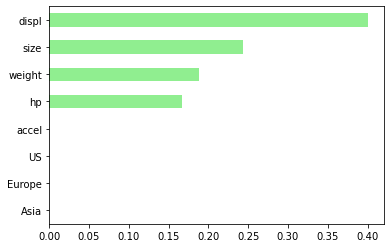

In [180]:
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()

### Train an RF regressor


In [183]:
bikes = pd.read_csv('bikes.csv')
y = bikes['cnt'].values
X = bikes.drop('cnt', axis=1)


# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=SEED)

In [184]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

### Evaluate the RF regressor


In [185]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 50.01


> You can try training a single CART on the same dataset. The test set RMSE achieved by rf is significantly smaller than that achieved by a single CART!

### Visualizing features importances


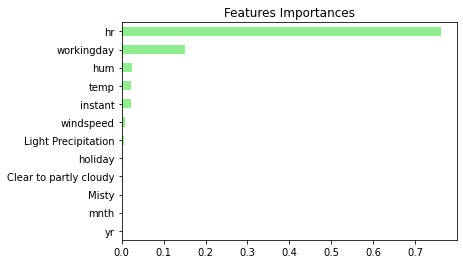

In [186]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()  

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

> Apparently, `hr` and `workingday` are the most important features according to `rf`. The importances of these two features add up to more than 90%!

# 4. Boosting

## Adaboost


**Boosting:** Ensemble method combining several weak learners to form a strong learner.
**Weak learner:** Model doing slightly better than random guessing.
* Example of weak learner: Decision stump (CART whose maximum depth is 1).

**Boosting**

* Train an ensemble of predictors sequentially.
* Each predictor tries to correct its predecessor.
* Most popularb oosting methods:
    * AdaBoost
    * GradientBoosting.


**Adaboost**     
* Stands for **Adaptive Boosting.**
* Each predictor pays more attention to the instances wrongly predicted by its predecessor.
* Achieved by changing the weights of training instances.
* Each predictor is assigned a coefficient $α$.
* $α$ depends on the predictor's training error.


**AdaBoost:Prediction**

Classification: 
* Weighted majority voting.
* Insklearn: `AdaBoostClassifier`

Regression:
* Weighted average.
* Insklearn: `AdaBoostRegressor`


**Learning Rate**

Learning rate: $0 < η ≤ 1$

In [187]:
X = wbc[['radius_mean', 'concave points_mean']].values
y = wbc['Diagnosis_num'].values

# Import models and utility functions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, 
                                                    random_state=SEED)
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)
# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)
# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)
# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
# Print adb_clf_roc_auc_score
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score)) 

ROC AUC score: 0.96


### Define the AdaBoost classifier


In [193]:
X = liver.drop('Liver_disease', axis=1)
y = liver['Liver_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, 
                                                    random_state=SEED)

In [194]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

### Train the AdaBoost classifier


In [195]:
# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]
y_pred_proba

array([0.39625798, 0.50765614, 0.6427682 , 0.51103487, 0.48780342,
       0.73943526, 0.76991857, 0.53736173, 0.4954065 , 0.73135885,
       0.47717298, 0.50985453, 0.49507249, 0.49491357, 0.49728655,
       0.5207147 , 0.65646446, 0.45504202, 0.52200441, 0.44185032,
       0.55923564, 0.59414692, 0.53064697, 0.50853596, 0.54925712,
       0.60424379, 0.54719743, 0.54350725, 0.50838599, 0.50969367,
       0.45769971, 0.54814034, 0.51781017, 0.47897927, 0.45723668,
       0.47955012, 0.52769609, 0.50896238, 0.7621668 , 0.43896318,
       0.52957775, 0.70307692, 0.57273417, 0.47260877, 0.643982  ,
       0.51904115, 0.4975862 , 0.56402374, 0.48282632, 0.51701353,
       0.48170323, 0.45883632, 0.61314736, 0.51353514, 0.52761699,
       0.50546511, 0.54698033, 0.53007825, 0.50862101, 0.65552032,
       0.51483476, 0.6221994 , 0.59261553, 0.53532121, 0.60741196,
       0.5081208 , 0.5046048 , 0.51254584, 0.76393968, 0.44109198,
       0.7414859 , 0.44313599, 0.51089002, 0.54777615, 0.67033

> Next, we'll evaluate ada's ROC AUC score.

### Evaluate the AdaBoost classifier


In [196]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.69


> This untuned AdaBoost classifier achieved a ROC AUC score of 0.69!

## Gradient Boosting (GB)

**Gradient Boosted Trees**
* Sequential correction of predecessor's errors.
* Does not tweak the weights of training instances.
* Fit each predictor is trained using its predecessor's residual errors as labels.
* Gradient Boosted Trees: a CART is used as a base learner.


**Gradient Boosted Trees: Prediction** 

Regression:
* $y_{pred}=y_{1}+ηr_{1}+...+ηr_{N}$
* Insklearn:`GradientBoostingRegressor`.

Classication:
* Insklearn:`GradientBoostingClassifier`


In [197]:
y = cleaned_auto['mpg'].values
X = cleaned_auto.drop('mpg', axis=1)

In [198]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
#Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.3,
                                                    random_state=SEED)
# Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)
# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)
# Predict the test set labels
y_pred = gbt.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))


Test set RMSE: 4.01


### Define the GB regressor


In [202]:
bikes = pd.read_csv('bikes.csv')
y = bikes['cnt'].values
X = bikes.drop('cnt', axis=1)
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.3,
                                                    random_state=SEED)

In [203]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(n_estimators=200, 
            max_depth=4,
            random_state=2)

### Train the GB regressor


In [204]:
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

### Evaluate the GB regressor


In [205]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 45.339


## Stochastic Gradient Boosting (SGB)

**Gradient Boosting: Cons**

* GB involves an exhaustive search procedure.
* Each CART is trained to find the best split points and features.
* May lead to CARTs using the same split points and maybe the same features.


**Stochastic Gradient Boosting**
* Each tree is trained on a random subset of rows of the training data.
* The sampled instances (40%-80%ofthetrainingset) are sampled without replacement.
* Features are sampled (without replacement) when choosing split points.
* Result: further ensemble diversity.
* Effect: adding further variance to the ensemble of trees.



In [206]:
y = cleaned_auto['mpg'].values
X = cleaned_auto.drop('mpg', axis=1)

In [207]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.3,    
                                                    random_state=SEED)

# Instantiate a stochastic GradientBoostingRegressor 'sgbt'
sgbt = GradientBoostingRegressor(max_depth=1,
                                 subsample=0.8,
                                 max_features=0.2,
                                 n_estimators=300, 
                                 random_state=SEED)
# Fit 'sgbt' to the training set
sgbt.fit(X_train, y_train)
# Predict the test set labels
y_pred = sgbt.predict(X_test)

# Evaluate test set RMSE 'rmse_test'
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print 'rmse_test'
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 3.95


### Regression with SGB


In [211]:
bikes = pd.read_csv('bikes.csv')
y = bikes['cnt'].values
X = bikes.drop('cnt', axis=1)
# Split dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.2,    
                                                    random_state=SEED)

In [209]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,
            random_state=2)

### Train the SGB regressor


In [212]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

### Evaluate the SGB regressor


In [213]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 45.143


> The stochastic gradient boosting regressor achieves a lower test set RMSE than the gradient boosting regressor (which was 45.339)!

# 5. Model Tuning

## Tuning a CART's Hyperparameters

**Hyperparameters**

Machine learning model:
* **parameters:** learned from data 
* CART example: split-point of a node, split-feature of a node ,...
* **hyperparameters:** not learned from data, set prior to training 
* CART example: max_depth, min_samples_leaf, splitting criterion...


**What is hyper parameter tuning?**
* **Problem:** search for a set of optimal hyperparameters for a learning algorithm.
* **Solution:** find a set of optimal hyperparameters that results in an optimal model.
* **Optimalmodel:** yields an optimal score.
* **Score:** in sklearn defaults to accuracy (classication) and $R^2$ (regression).
* Cross validation is used to estimate the generalization performance.


**Why tune hyperparameters?**
* In sklearn, a model's default hyperparameters are not optimal for all problems.
* Hyperparameters should be tuned to obtain the best model performance.

**Approaches to hyperparameter tuning**
* Grid Search
* Random Search
* Bayesian Optimization
* Genetic Algorithms

**Grid search cross validation**
* Manually set a grid of discrete hyperparameter values.
* Set a metric for scoring model performance.
* Search exhaustively through the grid.
* For each set of hyperparameters, evaluate eachmodel's CV score.
* The optimal hyperparameters are those of the model achieving the best CV score.

**Grid search cross validation: example**
* Hyperparameters grids:
    * `max_depth`={2,3,4},
    * `min_samples_leaf`={0.05,0.1}
* hyperparameterspace={(2,0.05),(2,0.1),(3,0.05),...}
* CVscores=${score_{(2,0.05)},...}$
* optimal hyperparameters = set of hyperparameters corresponding to the best CVscore.


In [215]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Set seed to 1 for reproducibility
SEED = 1
# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state=SEED)
# Print out 'dt's hyperparameters
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


In [220]:
X = wbc[['radius_mean', 'concave points_mean']].values
y = wbc['Diagnosis_num'].values

# Split dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.2,    
                                                    random_state=SEED)

In [221]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters 'params_dt'
params_dt = {'max_depth': [3, 4,5, 6],
             'min_samples_leaf': [0.04, 0.06, 0.08],
             'max_features': [0.2, 0.4,0.6, 0.8]            
            }

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='accuracy', 
                       cv=10,
                       n_jobs=-1)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)


# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 5, 'max_features': 0.2, 'min_samples_leaf': 0.04}


In [225]:
# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy {}'.format(best_CV_score))

Best CV accuracy 0.9101449275362319


In [226]:
# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_
# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)
# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.886


### Set the tree's hyperparameter grid


In [227]:
X = liver.drop('Liver_disease', axis=1)
y = liver['Liver_disease']

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.3,
                                                    random_state= 1)

In [228]:
# Define params_dt
params_dt = {'max_depth': [2,3,4],
             'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]}

### Search for the optimal tree


In [229]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

### Evaluate the optimal tree


In [231]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
             scoring='roc_auc')

In [232]:
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.707


## Tuning a RF's Hyperparameters


**Random Forests Hyperparameters**

* CART hyperparameters
* number of estimators
* bootstrap


**Tuning is expensive**

Hyperparameter tuning:
* computationally expensive,
* sometimes leads to very slight improvement

Weight the impact of tuning on the whole project.


In [233]:
# Import RandomForestRegressor 
from sklearn.ensemble import RandomForestRegressor
# Set seed for reproducibility
SEED = 1
# Instantiate a random forests regressor 'rf' 
rf = RandomForestRegressor(random_state= SEED)
# Inspect rf' s hyperparameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [235]:
X = wbc[['radius_mean', 'concave points_mean']].values
y = wbc['Diagnosis_num'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.2,
                                                    random_state= 1)

In [236]:
# Basic imports
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
# Define a grid of hyperparameter 'params_rf'
params_rf = {'n_estimators': [300, 400, 500],
             'max_depth': [4, 6, 8],
             'min_samples_leaf': [0.1, 0.2],
             'max_features': ['log2', 'sqrt']             
            }
# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       cv=3,
                       scoring='neg_mean_squared_error',
                       verbose=1, 
                       n_jobs=-1)


In [237]:
# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [238]:
# Extract the best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 500}


In [239]:
# Extract the best model from 'grid_rf'
best_model = grid_rf.best_estimator_
# Predict the test set labels
y_pred = best_model.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.26


### Set the hyperparameter grid of RF


In [241]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators': [100, 350, 500],
             'min_samples_leaf': [2, 10, 30],
             'max_features': ['log2', 'auto', 'sqrt']             
            }

In [240]:
bikes = pd.read_csv('bikes.csv')
y = bikes['cnt'].values
X = bikes.drop('cnt', axis=1)
# Split dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.2,    
                                                    random_state=SEED)


### Search for the optimal forest


In [242]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='neg_mean_squared_error', verbose=1)

### Evaluate the optimal forest


In [243]:
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE 

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Test RMSE of best model: 51.779
